In [4]:
import pandas as pd
%store -r  X
X:pd.DataFrame = X
X

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color_blue,Star color_bluewhite,Star color_orange,Star color_orangered,Star color_paleyelloworange,Star color_red,Star color_white,Star color_yellowish,Star color_yellowwhite
0,0.151602,0.147329,0.243442,0.876798,False,False,False,False,False,True,False,False,False
1,0.148790,0.079381,0.235546,0.891807,False,False,False,False,False,True,False,False,False
2,0.096917,0.057254,0.202094,0.957473,False,False,False,False,False,True,False,False,False
3,0.121402,0.039691,0.238535,0.893371,False,False,False,False,False,True,False,False,False
4,0.000000,0.023617,0.202884,1.000000,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.991127,0.964563,0.970656,0.062226,True,False,False,False,False,False,False,False,False
236,0.914065,0.999209,0.960358,0.040338,True,False,False,False,False,False,False,False,False
237,0.500831,0.980177,0.974560,0.037211,False,False,False,False,False,False,True,False,False
238,0.515685,0.967910,0.954599,0.021576,False,False,False,False,False,False,True,False,False


In [5]:
%store -r y
y:pd.Series = y
y

0      6.0
1      6.0
2      6.0
3      6.0
4      6.0
      ... 
235    0.0
236    0.0
237    2.0
238    2.0
239    0.0
Name: Spectral Class, Length: 240, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, f1_score
from typing import Tuple
import numpy as np


def hyperparameter_tuning_rfc() -> Tuple[dict, dict]:
    ht_rfc = RandomForestClassifier(n_jobs=-1)

    param_grid = {
        "n_estimators": np.arange(0, 700, 50),
        "max_depth": np.arange(1, 20),
        "criterion": ["gini", "entropy"]
    }

    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='macro'),
        'f1': make_scorer(f1_score, average='macro')
    }

    model = RandomizedSearchCV(
        estimator=ht_rfc,
        param_distributions=param_grid,
        n_iter=10,
        scoring=scoring,
        verbose=10,
        n_jobs=1,
        cv=5,
        refit='accuracy'
    )

    model.fit(X, y)
    best_params = model.best_estimator_.get_params()
    best_scores = {
        'accuracy': model.best_score_,
        'precision': model.cv_results_['mean_test_precision'][model.best_index_],
        'f1': model.cv_results_['mean_test_f1'][model.best_index_]
    }

    return best_params, best_scores

rfc_params, rfc_scores = hyperparameter_tuning_rfc()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=entropy, max_depth=10, n_estimators=300..........


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5; 1/10] END criterion=entropy, max_depth=10, n_estimators=300; accuracy: (test=0.917) f1: (test=0.877) precision: (test=0.873) total time=   0.4s
[CV 2/5; 1/10] START criterion=entropy, max_depth=10, n_estimators=300..........
[CV 2/5; 1/10] END criterion=entropy, max_depth=10, n_estimators=300; accuracy: (test=0.979) f1: (test=0.981) precision: (test=0.981) total time=   0.4s
[CV 3/5; 1/10] START criterion=entropy, max_depth=10, n_estimators=300..........
[CV 3/5; 1/10] END criterion=entropy, max_depth=10, n_estimators=300; accuracy: (test=0.958) f1: (test=0.938) precision: (test=0.948) total time=   0.3s
[CV 4/5; 1/10] START criterion=entropy, max_depth=10, n_estimators=300..........
[CV 4/5; 1/10] END criterion=entropy, max_depth=10, n_estimators=300; accuracy: (test=0.938) f1: (test=0.869) precision: (test=0.962) total time=   0.3s
[CV 5/5; 1/10] START criterion=entropy, max_depth=10, n_estimators=300..........


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 5/5; 1/10] END criterion=entropy, max_depth=10, n_estimators=300; accuracy: (test=0.812) f1: (test=0.556) precision: (test=0.640) total time=   0.3s
[CV 1/5; 2/10] START criterion=entropy, max_depth=4, n_estimators=300...........
[CV 1/5; 2/10] END criterion=entropy, max_depth=4, n_estimators=300; accuracy: (test=0.917) f1: (test=0.856) precision: (test=0.859) total time=   0.3s
[CV 2/5; 2/10] START criterion=entropy, max_depth=4, n_estimators=300...........
[CV 2/5; 2/10] END criterion=entropy, max_depth=4, n_estimators=300; accuracy: (test=0.958) f1: (test=0.948) precision: (test=0.940) total time=   0.3s
[CV 3/5; 2/10] START criterion=entropy, max_depth=4, n_estimators=300...........
[CV 3/5; 2/10] END criterion=entropy, max_depth=4, n_estimators=300; accuracy: (test=0.917) f1: (test=0.845) precision: (test=0.915) total time=   0.3s
[CV 4/5; 2/10] START criterion=entropy, max_depth=4, n_estimators=300...........


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 4/5; 2/10] END criterion=entropy, max_depth=4, n_estimators=300; accuracy: (test=0.896) f1: (test=0.682) precision: (test=0.743) total time=   0.3s
[CV 5/5; 2/10] START criterion=entropy, max_depth=4, n_estimators=300...........


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 5/5; 2/10] END criterion=entropy, max_depth=4, n_estimators=300; accuracy: (test=0.896) f1: (test=0.602) precision: (test=0.667) total time=   0.3s
[CV 1/5; 3/10] START criterion=gini, max_depth=9, n_estimators=250..............
[CV 1/5; 3/10] END criterion=gini, max_depth=9, n_estimators=250; accuracy: (test=0.917) f1: (test=0.878) precision: (test=0.910) total time=   0.3s
[CV 2/5; 3/10] START criterion=gini, max_depth=9, n_estimators=250..............
[CV 2/5; 3/10] END criterion=gini, max_depth=9, n_estimators=250; accuracy: (test=0.958) f1: (test=0.948) precision: (test=0.940) total time=   0.2s
[CV 3/5; 3/10] START criterion=gini, max_depth=9, n_estimators=250..............
[CV 3/5; 3/10] END criterion=gini, max_depth=9, n_estimators=250; accuracy: (test=0.958) f1: (test=0.938) precision: (test=0.948) total time=   0.2s
[CV 4/5; 3/10] START criterion=gini, max_depth=9, n_estimators=250..............
[CV 4/5; 3/10] END criterion=gini, max_depth=9, n_estimators=250; accuracy: (

c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 5/5; 3/10] END criterion=gini, max_depth=9, n_estimators=250; accuracy: (test=0.812) f1: (test=0.556) precision: (test=0.640) total time=   0.2s
[CV 1/5; 4/10] START criterion=entropy, max_depth=1, n_estimators=150...........


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 1/5; 4/10] END criterion=entropy, max_depth=1, n_estimators=150; accuracy: (test=0.812) f1: (test=0.431) precision: (test=0.397) total time=   0.1s
[CV 2/5; 4/10] START criterion=entropy, max_depth=1, n_estimators=150...........


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 2/5; 4/10] END criterion=entropy, max_depth=1, n_estimators=150; accuracy: (test=0.750) f1: (test=0.391) precision: (test=0.367) total time=   0.2s
[CV 3/5; 4/10] START criterion=entropy, max_depth=1, n_estimators=150...........


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 3/5; 4/10] END criterion=entropy, max_depth=1, n_estimators=150; accuracy: (test=0.625) f1: (test=0.283) precision: (test=0.250) total time=   0.1s
[CV 4/5; 4/10] START criterion=entropy, max_depth=1, n_estimators=150...........


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 4/5; 4/10] END criterion=entropy, max_depth=1, n_estimators=150; accuracy: (test=0.646) f1: (test=0.288) precision: (test=0.254) total time=   0.1s
[CV 5/5; 4/10] START criterion=entropy, max_depth=1, n_estimators=150...........


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 5/5; 4/10] END criterion=entropy, max_depth=1, n_estimators=150; accuracy: (test=0.750) f1: (test=0.357) precision: (test=0.339) total time=   0.2s
[CV 1/5; 5/10] START criterion=entropy, max_depth=9, n_estimators=450...........
[CV 1/5; 5/10] END criterion=entropy, max_depth=9, n_estimators=450; accuracy: (test=0.917) f1: (test=0.878) precision: (test=0.910) total time=   0.5s
[CV 2/5; 5/10] START criterion=entropy, max_depth=9, n_estimators=450...........
[CV 2/5; 5/10] END criterion=entropy, max_depth=9, n_estimators=450; accuracy: (test=0.938) f1: (test=0.888) precision: (test=0.856) total time=   0.5s
[CV 3/5; 5/10] START criterion=entropy, max_depth=9, n_estimators=450...........
[CV 3/5; 5/10] END criterion=entropy, max_depth=9, n_estimators=450; accuracy: (test=0.958) f1: (test=0.938) precision: (test=0.948) total time=   0.6s
[CV 4/5; 5/10] START criterion=entropy, max_depth=9, n_estimators=450...........
[CV 4/5; 5/10] END criterion=entropy, max_depth=9, n_estimators=450;

c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 5/5; 5/10] END criterion=entropy, max_depth=9, n_estimators=450; accuracy: (test=0.833) f1: (test=0.577) precision: (test=0.645) total time=   0.5s
[CV 1/5; 6/10] START criterion=gini, max_depth=1, n_estimators=0................
[CV 1/5; 6/10] END criterion=gini, max_depth=1, n_estimators=0; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) total time=   0.0s
[CV 2/5; 6/10] START criterion=gini, max_depth=1, n_estimators=0................
[CV 2/5; 6/10] END criterion=gini, max_depth=1, n_estimators=0; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) total time=   0.0s
[CV 3/5; 6/10] START criterion=gini, max_depth=1, n_estimators=0................
[CV 3/5; 6/10] END criterion=gini, max_depth=1, n_estimators=0; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) total time=   0.0s
[CV 4/5; 6/10] START criterion=gini, max_depth=1, n_estimators=0................
[CV 4/5; 6/10] END criterion=gini, max_depth=1, n_estimators=0; accuracy: (test=nan) f1: (test=nan) p

c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 4/5; 7/10] END criterion=entropy, max_depth=5, n_estimators=150; accuracy: (test=0.917) f1: (test=0.734) precision: (test=0.754) total time=   0.2s
[CV 5/5; 7/10] START criterion=entropy, max_depth=5, n_estimators=150...........


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 5/5; 7/10] END criterion=entropy, max_depth=5, n_estimators=150; accuracy: (test=0.854) f1: (test=0.596) precision: (test=0.651) total time=   0.2s
[CV 1/5; 8/10] START criterion=entropy, max_depth=4, n_estimators=50............
[CV 1/5; 8/10] END criterion=entropy, max_depth=4, n_estimators=50; accuracy: (test=0.875) f1: (test=0.782) precision: (test=0.787) total time=   0.0s
[CV 2/5; 8/10] START criterion=entropy, max_depth=4, n_estimators=50............
[CV 2/5; 8/10] END criterion=entropy, max_depth=4, n_estimators=50; accuracy: (test=0.958) f1: (test=0.948) precision: (test=0.940) total time=   0.0s
[CV 3/5; 8/10] START criterion=entropy, max_depth=4, n_estimators=50............
[CV 3/5; 8/10] END criterion=entropy, max_depth=4, n_estimators=50; accuracy: (test=0.917) f1: (test=0.845) precision: (test=0.915) total time=   0.0s
[CV 4/5; 8/10] START criterion=entropy, max_depth=4, n_estimators=50............
[CV 4/5; 8/10] END criterion=entropy, max_depth=4, n_estimators=50; acc

c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 1/5; 9/10] END criterion=entropy, max_depth=10, n_estimators=250; accuracy: (test=0.917) f1: (test=0.877) precision: (test=0.873) total time=   0.3s
[CV 2/5; 9/10] START criterion=entropy, max_depth=10, n_estimators=250..........
[CV 2/5; 9/10] END criterion=entropy, max_depth=10, n_estimators=250; accuracy: (test=0.958) f1: (test=0.948) precision: (test=0.940) total time=   0.3s
[CV 3/5; 9/10] START criterion=entropy, max_depth=10, n_estimators=250..........
[CV 3/5; 9/10] END criterion=entropy, max_depth=10, n_estimators=250; accuracy: (test=0.958) f1: (test=0.938) precision: (test=0.948) total time=   0.2s
[CV 4/5; 9/10] START criterion=entropy, max_depth=10, n_estimators=250..........
[CV 4/5; 9/10] END criterion=entropy, max_depth=10, n_estimators=250; accuracy: (test=0.938) f1: (test=0.869) precision: (test=0.962) total time=   0.2s
[CV 5/5; 9/10] START criterion=entropy, max_depth=10, n_estimators=250..........


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 5/5; 9/10] END criterion=entropy, max_depth=10, n_estimators=250; accuracy: (test=0.812) f1: (test=0.556) precision: (test=0.640) total time=   0.2s
[CV 1/5; 10/10] START criterion=gini, max_depth=1, n_estimators=550.............


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 1/5; 10/10] END criterion=gini, max_depth=1, n_estimators=550; accuracy: (test=0.792) f1: (test=0.436) precision: (test=0.418) total time=   0.6s
[CV 2/5; 10/10] START criterion=gini, max_depth=1, n_estimators=550.............


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 2/5; 10/10] END criterion=gini, max_depth=1, n_estimators=550; accuracy: (test=0.625) f1: (test=0.267) precision: (test=0.222) total time=   0.6s
[CV 3/5; 10/10] START criterion=gini, max_depth=1, n_estimators=550.............


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 3/5; 10/10] END criterion=gini, max_depth=1, n_estimators=550; accuracy: (test=0.792) f1: (test=0.431) precision: (test=0.392) total time=   0.6s
[CV 4/5; 10/10] START criterion=gini, max_depth=1, n_estimators=550.............


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 4/5; 10/10] END criterion=gini, max_depth=1, n_estimators=550; accuracy: (test=0.646) f1: (test=0.286) precision: (test=0.252) total time=   0.6s
[CV 5/5; 10/10] START criterion=gini, max_depth=1, n_estimators=550.............


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selecti

[CV 5/5; 10/10] END criterion=gini, max_depth=1, n_estimators=550; accuracy: (test=0.812) f1: (test=0.391) precision: (test=0.362) total time=   0.7s


In [20]:
from sklearn.svm import SVC

def hyperparameter_tuning_svm() -> Tuple[dict, dict]:
    ht_svm = SVC()

    param_grid = {
        "C": np.logspace(-3, 3, 7),
        "gamma": np.logspace(-3, 3, 7),
        "kernel": ["linear", "rbf", "poly", "sigmoid"]
    }

    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='macro'),
        'f1': make_scorer(f1_score, average='macro')
    }

    model = RandomizedSearchCV(
        estimator=ht_svm,
        param_distributions=param_grid,
        n_iter=10,
        scoring=scoring,
        verbose=10,
        n_jobs=1,
        cv=5,
        refit='accuracy'  # Choose one metric for refitting the estimator
    )

    model.fit(X, y)
    best_params = model.best_estimator_.get_params()
    best_scores = {
        'accuracy': model.best_score_,
        'precision': model.cv_results_['mean_test_precision'][model.best_index_],
        'f1': model.cv_results_['mean_test_f1'][model.best_index_]
    }

    return best_params, best_scores

svm_params, svm_scores = hyperparameter_tuning_svm()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=10.0, gamma=0.1, kernel=sigmoid..........................
[CV 1/5; 1/10] END C=10.0, gamma=0.1, kernel=sigmoid; accuracy: (test=0.896) f1: (test=0.808) precision: (test=0.811) total time=   0.0s
[CV 2/5; 1/10] START C=10.0, gamma=0.1, kernel=sigmoid..........................
[CV 2/5; 1/10] END C=10.0, gamma=0.1, kernel=sigmoid; accuracy: (test=0.917) f1: (test=0.824) precision: (test=0.868) total time=   0.0s
[CV 3/5; 1/10] START C=10.0, gamma=0.1, kernel=sigmoid..........................
[CV 3/5; 1/10] END C=10.0, gamma=0.1, kernel=sigmoid; accuracy: (test=0.917) f1: (test=0.857) precision: (test=0.936) total time=   0.0s
[CV 4/5; 1/10] START C=10.0, gamma=0.1, kernel=sigmoid..........................
[CV 4/5; 1/10] END C=10.0, gamma=0.1, kernel=sigmoid; accuracy: (test=0.833) f1: (test=0.543) precision: (test=0.600) total time=   0.0s
[CV 5/5; 1/10] START C=10.0, gamma=0.1, kernel=sigmoid.............

c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\skl

[CV 4/5; 3/10] END C=1.0, gamma=0.01, kernel=linear; accuracy: (test=0.833) f1: (test=0.543) precision: (test=0.600) total time=   0.0s
[CV 5/5; 3/10] START C=1.0, gamma=0.01, kernel=linear...........................
[CV 5/5; 3/10] END C=1.0, gamma=0.01, kernel=linear; accuracy: (test=0.896) f1: (test=0.604) precision: (test=0.629) total time=   0.0s
[CV 1/5; 4/10] START C=0.1, gamma=1.0, kernel=linear............................
[CV 1/5; 4/10] END C=0.1, gamma=1.0, kernel=linear; accuracy: (test=0.875) f1: (test=0.582) precision: (test=0.536) total time=   0.0s
[CV 2/5; 4/10] START C=0.1, gamma=1.0, kernel=linear............................
[CV 2/5; 4/10] END C=0.1, gamma=1.0, kernel=linear; accuracy: (test=0.854) f1: (test=0.583) precision: (test=0.581) total time=   0.0s
[CV 3/5; 4/10] START C=0.1, gamma=1.0, kernel=linear............................
[CV 3/5; 4/10] END C=0.1, gamma=1.0, kernel=linear; accuracy: (test=0.875) f1: (test=0.611) precision: (test=0.584) total time=   0.0s

c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

[CV 3/5; 8/10] END C=0.1, gamma=10.0, kernel=poly; accuracy: (test=0.917) f1: (test=0.883) precision: (test=0.881) total time=   0.0s
[CV 4/5; 8/10] START C=0.1, gamma=10.0, kernel=poly.............................
[CV 4/5; 8/10] END C=0.1, gamma=10.0, kernel=poly; accuracy: (test=0.938) f1: (test=0.773) precision: (test=0.768) total time=   0.0s
[CV 5/5; 8/10] START C=0.1, gamma=10.0, kernel=poly.............................
[CV 5/5; 8/10] END C=0.1, gamma=10.0, kernel=poly; accuracy: (test=0.833) f1: (test=0.657) precision: (test=0.723) total time=   0.0s
[CV 1/5; 9/10] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/5; 9/10] END C=0.1, gamma=0.1, kernel=rbf; accuracy: (test=0.708) f1: (test=0.349) precision: (test=0.386) total time=   0.0s
[CV 2/5; 9/10] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/5; 9/10] END C=0.1, gamma=0.1, kernel=rbf; accuracy: (test=0.750) f1: (test=0.386) precision: (test=0.402) total time=   0.0s
[CV 3/5; 9

c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [21]:
from sklearn.neighbors import KNeighborsClassifier

def hyperparameter_tuning_knn() -> Tuple[dict, dict]:
    ht_knn = KNeighborsClassifier()

    param_grid = {
        "n_neighbors": np.arange(1, 31),
        "weights": ["uniform", "distance"],
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
        "p": [1, 2]
    }

    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='macro'),
        'f1': make_scorer(f1_score, average='macro')
    }

    model = RandomizedSearchCV(
        estimator=ht_knn,
        param_distributions=param_grid,
        n_iter=10,
        scoring=scoring,
        verbose=10,
        n_jobs=1,
        cv=5,
        refit='accuracy'
    )

    model.fit(X, y)
    best_params = model.best_estimator_.get_params()
    best_scores = {
        'accuracy': model.best_score_,
        'precision': model.cv_results_['mean_test_precision'][model.best_index_],
        'f1': model.cv_results_['mean_test_f1'][model.best_index_]
    }

    return best_params, best_scores

knn_params, knn_scores = hyperparameter_tuning_knn()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START algorithm=auto, n_neighbors=16, p=2, weights=uniform.......
[CV 1/5; 1/10] END algorithm=auto, n_neighbors=16, p=2, weights=uniform; accuracy: (test=0.750) f1: (test=0.509) precision: (test=0.509) total time=   0.0s
[CV 2/5; 1/10] START algorithm=auto, n_neighbors=16, p=2, weights=uniform.......
[CV 2/5; 1/10] END algorithm=auto, n_neighbors=16, p=2, weights=uniform; accuracy: (test=0.792) f1: (test=0.573) precision: (test=0.590) total time=   0.0s
[CV 3/5; 1/10] START algorithm=auto, n_neighbors=16, p=2, weights=uniform.......
[CV 3/5; 1/10] END algorithm=auto, n_neighbors=16, p=2, weights=uniform; accuracy: (test=0.875) f1: (test=0.590) precision: (test=0.547) total time=   0.0s
[CV 4/5; 1/10] START algorithm=auto, n_neighbors=16, p=2, weights=uniform.......
[CV 4/5; 1/10] END algorithm=auto, n_neighbors=16, p=2, weights=uniform; accuracy: (test=0.667) f1: (test=0.362) precision: (test=0.350) total time

c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\skl

[CV 1/5; 6/10] END algorithm=auto, n_neighbors=12, p=1, weights=uniform; accuracy: (test=0.875) f1: (test=0.627) precision: (test=0.627) total time=   0.0s
[CV 2/5; 6/10] START algorithm=auto, n_neighbors=12, p=1, weights=uniform.......
[CV 2/5; 6/10] END algorithm=auto, n_neighbors=12, p=1, weights=uniform; accuracy: (test=0.833) f1: (test=0.647) precision: (test=0.696) total time=   0.0s
[CV 3/5; 6/10] START algorithm=auto, n_neighbors=12, p=1, weights=uniform.......
[CV 3/5; 6/10] END algorithm=auto, n_neighbors=12, p=1, weights=uniform; accuracy: (test=0.917) f1: (test=0.716) precision: (test=0.741) total time=   0.0s
[CV 4/5; 6/10] START algorithm=auto, n_neighbors=12, p=1, weights=uniform.......
[CV 4/5; 6/10] END algorithm=auto, n_neighbors=12, p=1, weights=uniform; accuracy: (test=0.750) f1: (test=0.456) precision: (test=0.446) total time=   0.0s
[CV 5/5; 6/10] START algorithm=auto, n_neighbors=12, p=1, weights=uniform.......
[CV 5/5; 6/10] END algorithm=auto, n_neighbors=12, p

c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

[CV 5/5; 10/10] END algorithm=kd_tree, n_neighbors=18, p=1, weights=uniform; accuracy: (test=0.854) f1: (test=0.511) precision: (test=0.514) total time=   0.0s


c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
from sklearn.tree import DecisionTreeClassifier

def hyperparameter_tuning_tree() -> Tuple[dict, dict]:
    ht_dtc = DecisionTreeClassifier()

    param_grid = {
        "max_depth": np.arange(1, 20),
        "min_samples_split": np.arange(2, 21),
        "min_samples_leaf": np.arange(1, 21),
        "criterion": ["gini", "entropy"]
    }

    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='macro'),
        'f1': make_scorer(f1_score, average='macro')
    }

    model = RandomizedSearchCV(
        estimator=ht_dtc,
        param_distributions=param_grid,
        n_iter=10,
        scoring=scoring,
        verbose=10,
        n_jobs=1,
        cv=5,
        refit='accuracy'
    )

    model.fit(X, y)

    best_params = model.best_estimator_.get_params()
    best_scores = {
        'accuracy': model.best_score_,
        'precision': model.cv_results_['mean_test_precision'][model.best_index_],
        'f1': model.cv_results_['mean_test_f1'][model.best_index_]
    }

    return best_params, best_scores

tree_params, tree_scores = hyperparameter_tuning_tree()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=gini, max_depth=4, min_samples_leaf=14, min_samples_split=11
[CV 1/5; 1/10] END criterion=gini, max_depth=4, min_samples_leaf=14, min_samples_split=11; accuracy: (test=0.833) f1: (test=0.581) precision: (test=0.600) total time=   0.0s
[CV 2/5; 1/10] START criterion=gini, max_depth=4, min_samples_leaf=14, min_samples_split=11
[CV 2/5; 1/10] END criterion=gini, max_depth=4, min_samples_leaf=14, min_samples_split=11; accuracy: (test=0.812) f1: (test=0.602) precision: (test=0.656) total time=   0.0s
[CV 3/5; 1/10] START criterion=gini, max_depth=4, min_samples_leaf=14, min_samples_split=11
[CV 3/5; 1/10] END criterion=gini, max_depth=4, min_samples_leaf=14, min_samples_split=11; accuracy: (test=0.792) f1: (test=0.485) precision: (test=0.460) total time=   0.0s
[CV 4/5; 1/10] START criterion=gini, max_depth=4, min_samples_leaf=14, min_samples_split=11
[CV 4/5; 1/10] END criterion=gini, max_depth=4, m

c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\skl

[CV 1/5; 7/10] END criterion=gini, max_depth=1, min_samples_leaf=6, min_samples_split=17; accuracy: (test=0.667) f1: (test=0.255) precision: (test=0.227) total time=   0.0s
[CV 2/5; 7/10] START criterion=gini, max_depth=1, min_samples_leaf=6, min_samples_split=17
[CV 2/5; 7/10] END criterion=gini, max_depth=1, min_samples_leaf=6, min_samples_split=17; accuracy: (test=0.667) f1: (test=0.259) precision: (test=0.231) total time=   0.0s
[CV 3/5; 7/10] START criterion=gini, max_depth=1, min_samples_leaf=6, min_samples_split=17
[CV 3/5; 7/10] END criterion=gini, max_depth=1, min_samples_leaf=6, min_samples_split=17; accuracy: (test=0.646) f1: (test=0.252) precision: (test=0.224) total time=   0.0s
[CV 4/5; 7/10] START criterion=gini, max_depth=1, min_samples_leaf=6, min_samples_split=17
[CV 4/5; 7/10] END criterion=gini, max_depth=1, min_samples_leaf=6, min_samples_split=17; accuracy: (test=0.646) f1: (test=0.252) precision: (test=0.224) total time=   0.0s
[CV 5/5; 7/10] START criterion=gini

c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [30]:
print("Random Forest Scores:", rfc_scores)
print("SVM Scores:", svm_scores)
print("KNN Scores: ", knn_scores)
print("Tree Scores: ", tree_scores)

Random Forest Scores: {'accuracy': 0.9208333333333332, 'precision': 0.8810218646088211, 'f1': 0.8442049738000742}
SVM Scores: {'accuracy': 0.9041666666666668, 'precision': 0.7675983436853002, 'f1': 0.7585220386973964}
KNN Scores:  {'accuracy': 0.9375, 'precision': 0.8417686178555744, 'f1': 0.8302726176571916}
Tree Scores:  {'accuracy': 0.8916666666666666, 'precision': 0.8072330447330447, 'f1': 0.7873288911524206}


In [31]:
# Choosing Random Forest because precision and F1 scores are higher than KNN
# Although KNN has higher accuracy, RF'S higher F1 score indicates better balance between precision and recall
# Higher F1 is crucial in imbalanced datasets like the one we are using

rfc_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
rfc = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state=42, max_depth=10)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.93      1.00      0.96        13
         2.0       1.00      0.50      0.67         2
         3.0       0.75      1.00      0.86         3
         5.0       1.00      0.33      0.50         3
         6.0       0.97      1.00      0.98        28

    accuracy                           0.95        60
   macro avg       0.94      0.81      0.83        60
weighted avg       0.96      0.95      0.94        60



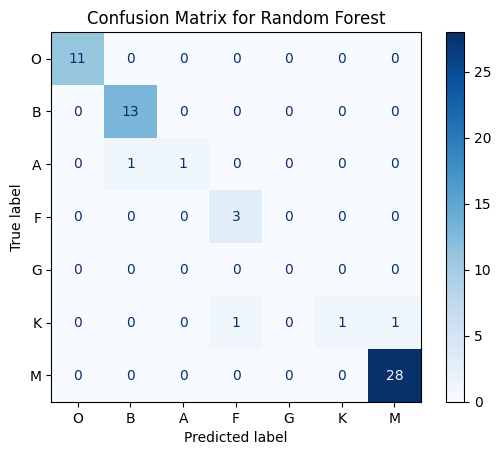

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['O','B','A','F','G','K','M'])
disp.plot(cmap=plt.cm.Blues, values_format='d') 
plt.title('Confusion Matrix for Random Forest')
plt.show()